In [174]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [176]:
# Simulate temperature data thoughout the day ( 0 - 24 hours)
hours = np.linspace(0, 24, 100).reshape(-1, 1)

# Temperature follows a pattern: cold at night, warm during day
temperature = (15 + 10 * np.sin((hours - 6) * np.pi / 12) 
+ np.random.randn(100, 1) *2).ravel()


In [178]:
print(f"Samples: {len(hours)}")
print(f"Features: {hours.shape}")
print(f"Temperature range: {temperature.min():.2f}°C to {temperature.max():.2f}°C")

Samples: 100
Features: (100, 1)
Temperature range: 2.14°C to 28.42°C


In [180]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split (
    hours, temperature,
    test_size = 0.2,  # 20% for testing
    random_state = 42  # for reproducibility 
)

In [182]:
print(f"Training sample: {len(X_train)} --> ({len(X_train)/len(hours) * 100 :.0f}%)")
print(f"Test sample: {len(X_test)} --> ({len(X_test)/len(hours) * 100:.0f}%)")

Training sample: 80 --> (80%)
Test sample: 20 --> (20%)


In [184]:
# Define degrees to test 
degrees_to_test = [1, 2, 3, 4, 5, 6, 7, 8 , 9, 10]

# Store results 
results = []

print(f"Degree   | Train R²  | Test R²   | Train RMSE |  Test RMSE   |  MAE  | Status \n")

for degree in degrees_to_test:
    # Transform features 
    poly = PolynomialFeatures(degree = degree, include_bias = False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions 
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Detecting overfitting 
    overfitting = (train_r2 - test_r2) > 0.1  # If gap > 0.1 likely overfitting
    status = "Overfit" if overfitting else "Ok"

    #Store results
    results.append({
        "degree" : degree,
        "train_r2": train_r2,
        "test_r2": test_r2,
        "train_rmse": train_rmse,
        "test_rmse": test_rmse,
        "test_mae": test_mae,
        "overfitting": overfitting,
        "model" : model,
        "poly": poly
    })
    print(f"{degree:2d}       | {train_r2:7.4f}   | {test_r2:7.4f}   | {train_rmse:7.4f}     |  {test_rmse:7.4f}    |{test_mae:5.2f}  | {status}")




Degree   | Train R²  | Test R²   | Train RMSE |  Test RMSE   |  MAE  | Status 

 1       |  0.0077   | -0.0542   |  7.3640     |   6.7283    | 5.67  | Ok
 2       |  0.8423   |  0.8366   |  2.9352     |   2.6492    | 2.27  | Ok
 3       |  0.8427   |  0.8346   |  2.9316     |   2.6653    | 2.29  | Ok
 4       |  0.9151   |  0.8957   |  2.1544     |   2.1164    | 1.71  | Ok
 5       |  0.9202   |  0.8830   |  2.0882     |   2.2418    | 1.69  | Ok
 6       |  0.9236   |  0.9103   |  2.0435     |   1.9623    | 1.54  | Ok
 7       |  0.9243   |  0.8956   |  2.0338     |   2.1175    | 1.60  | Ok
 8       |  0.9243   |  0.8982   |  2.0336     |   2.0910    | 1.59  | Ok
 9       |  0.9243   |  0.8960   |  2.0335     |   2.1129    | 1.61  | Ok
10       |  0.9245   |  0.9059   |  2.0315     |   2.0098    | 1.57  | Ok


In [154]:
# Find the best degree 
# Method 1: Best test R2 (test_r2)
best_by_r2 = max(results, key = lambda x: x["test_r2"])
print(f"Best by Test R2: Degree {best_by_r2["degree"]} (R² = {best_by_r2["test_r2"]:.4f})")


# Method 2. Best test RMSE (test_rmse)
best_by_rmse = min(results, key = lambda x: x["test_rmse"])
print(f"Best by Test RMSE: Degree {best_by_rmse["degree"]} (RMSE = {best_by_rmse["test_rmse"]:.4f})")

# Method 3. Best without overfitting
non_overfit = [r for r in results if not r["overfitting"]]
if non_overfit:
    best_no_overfit = max(non_overfit, key = lambda x: x["test_r2"])
    print(f"Best without overfitting: Degree {best_no_overfit["degree"]} (R² = {best_no_overfit["test_r2"]:.4f})\n\n")


# Recommendation 
chosen = best_by_rmse # Usually choose by the RMSE real applications 
print(f"Use Degree {chosen["degree"]} - balances accuracy and complexity")
print(f"Test R² = {chosen["test_r2"]:.4f}, Test RMSE = {chosen["test_rmse"]:.4f}")


Best by Test R2: Degree 6 (R² = 0.9523)
Best by Test RMSE: Degree 6 (RMSE = 1.3575)
Best without overfitting: Degree 6 (R² = 0.9523)


Use Degree 6 - balances accuracy and complexity
Test R² = 0.9523, Test RMSE = 1.3575


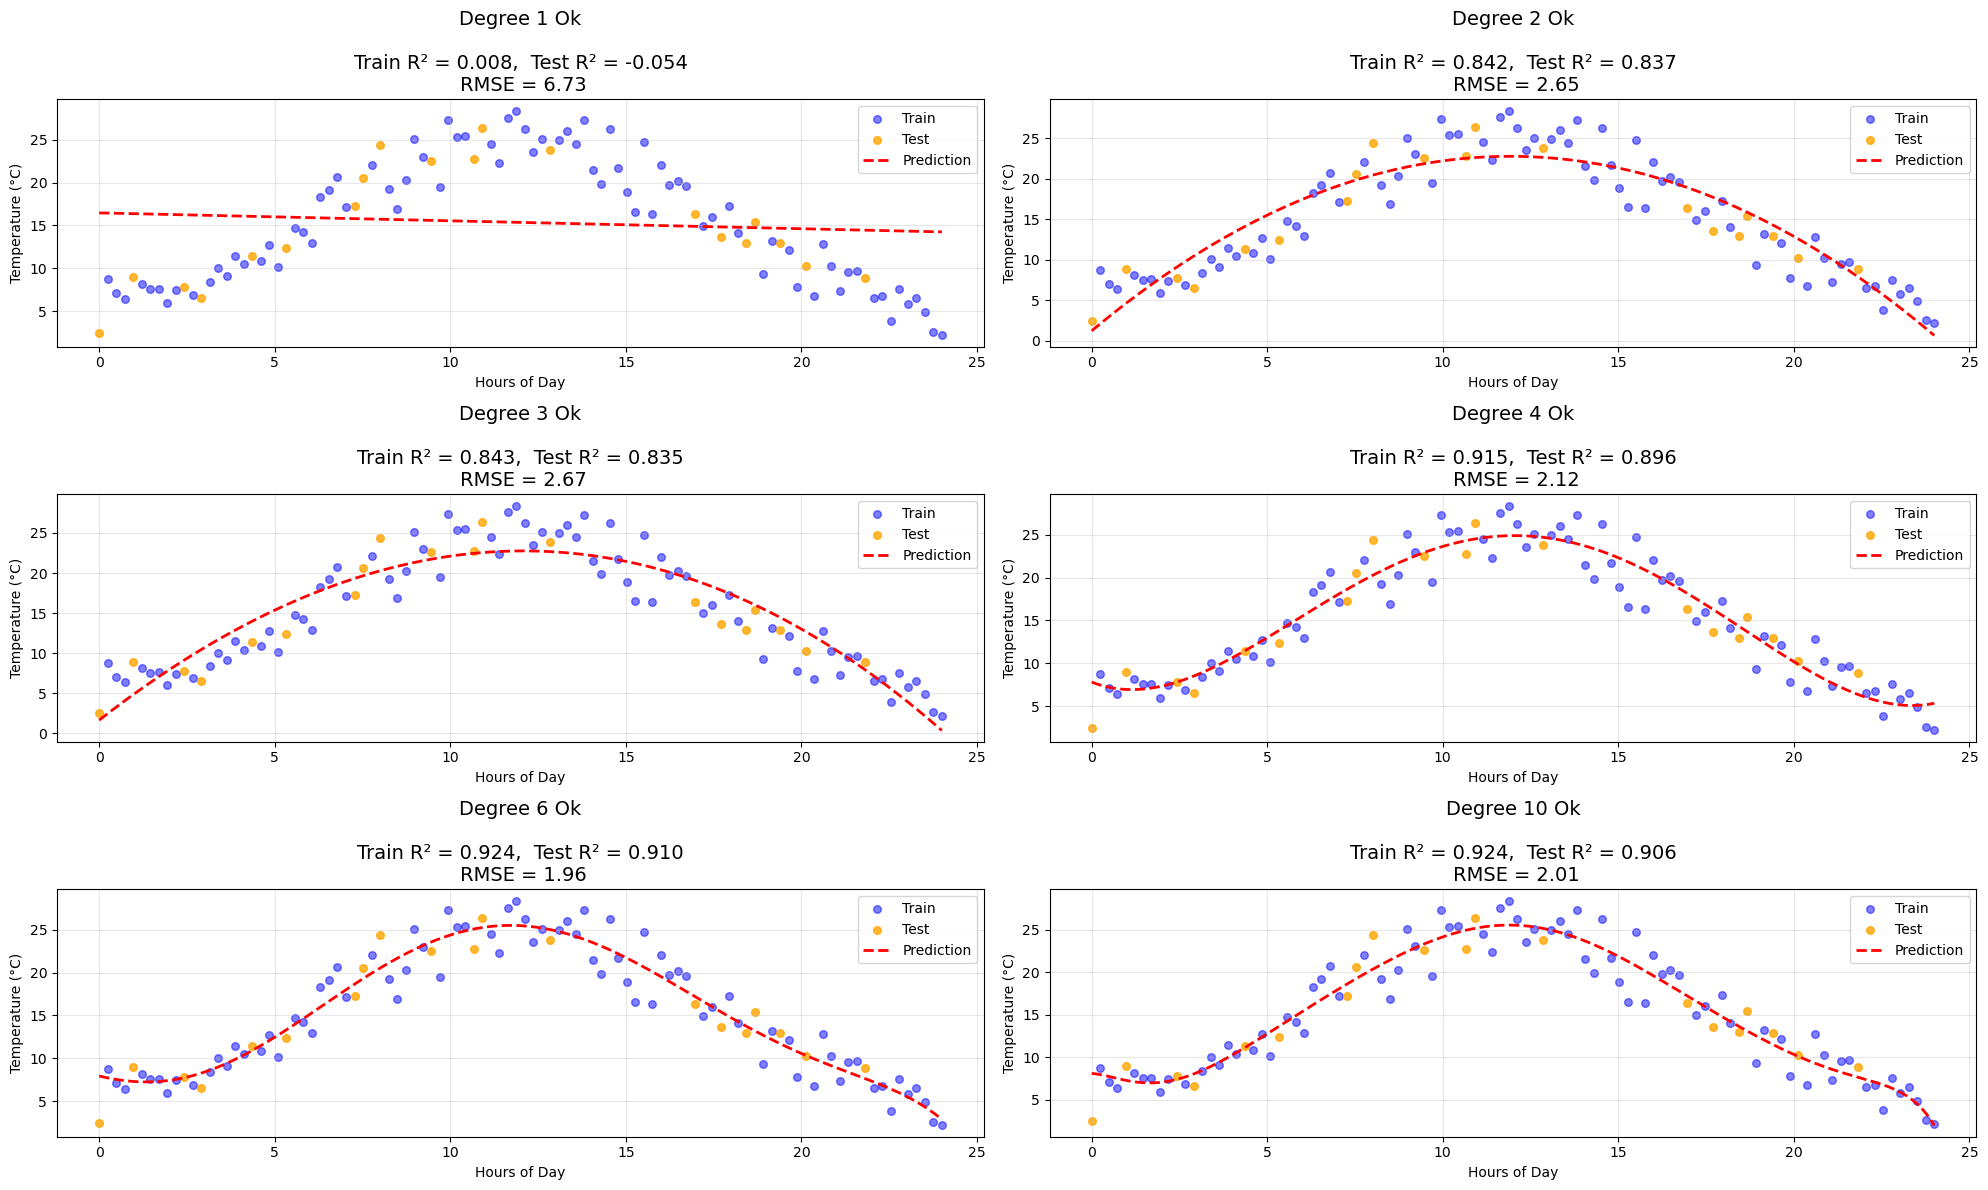

In [223]:
# Visualize all models

#Plot 1. Model comparisons
fig, axes = plt.subplots(3,2, figsize = (20,12))
axes = axes.ravel()

degrees_to_plot = [1, 2, 3, 4, 6, 10]

for idx, degree in enumerate(degrees_to_plot):
    # Returns the first item from the generator and stops iterating (next)
    result = next(r for r in results if r["degree"] == degree)

    # Get predictions for smooth line 
    X_plot = np.linspace(0, 24, 300).reshape(-1, 1)
    X_plot_poly = result["poly"].transform(X_plot)
    # Fit model 
    #y_plot = result["model"].fit(X_plot_poly, y_train) (dimentions are different)

    # Predictions 
    y_plot = result["model"].predict(X_plot_poly)

    # Plot 
    axes[idx].scatter(X_train, y_train, alpha = 0.5, s = 30, label = "Train", color = "blue")
    axes[idx].scatter(X_test, y_test, alpha = 0.8, s = 30, label = "Test", color = "orange")
    axes[idx].plot(X_plot, y_plot, "r--", linewidth = 2, label = "Prediction")

    # Add metrics to title 
    status = "Overfit" if result["overfitting"] else "Ok"
    axes[idx].set_title(
      f"Degree {degree} {status}\n\n"
      f"Train R² = {result["train_r2"]:.3f},  Test R² = {result["test_r2"]:.3f}\n"
      f" RMSE = {result["test_rmse"]:.2f}", fontsize = 14
)

    axes[idx].set_xlabel("Hours of Day")
    axes[idx].set_ylabel("Temperature (°C)")
    axes[idx].legend(fontsize = 10)
    axes[idx].grid("True", alpha = 0.3)

plt.tight_layout()

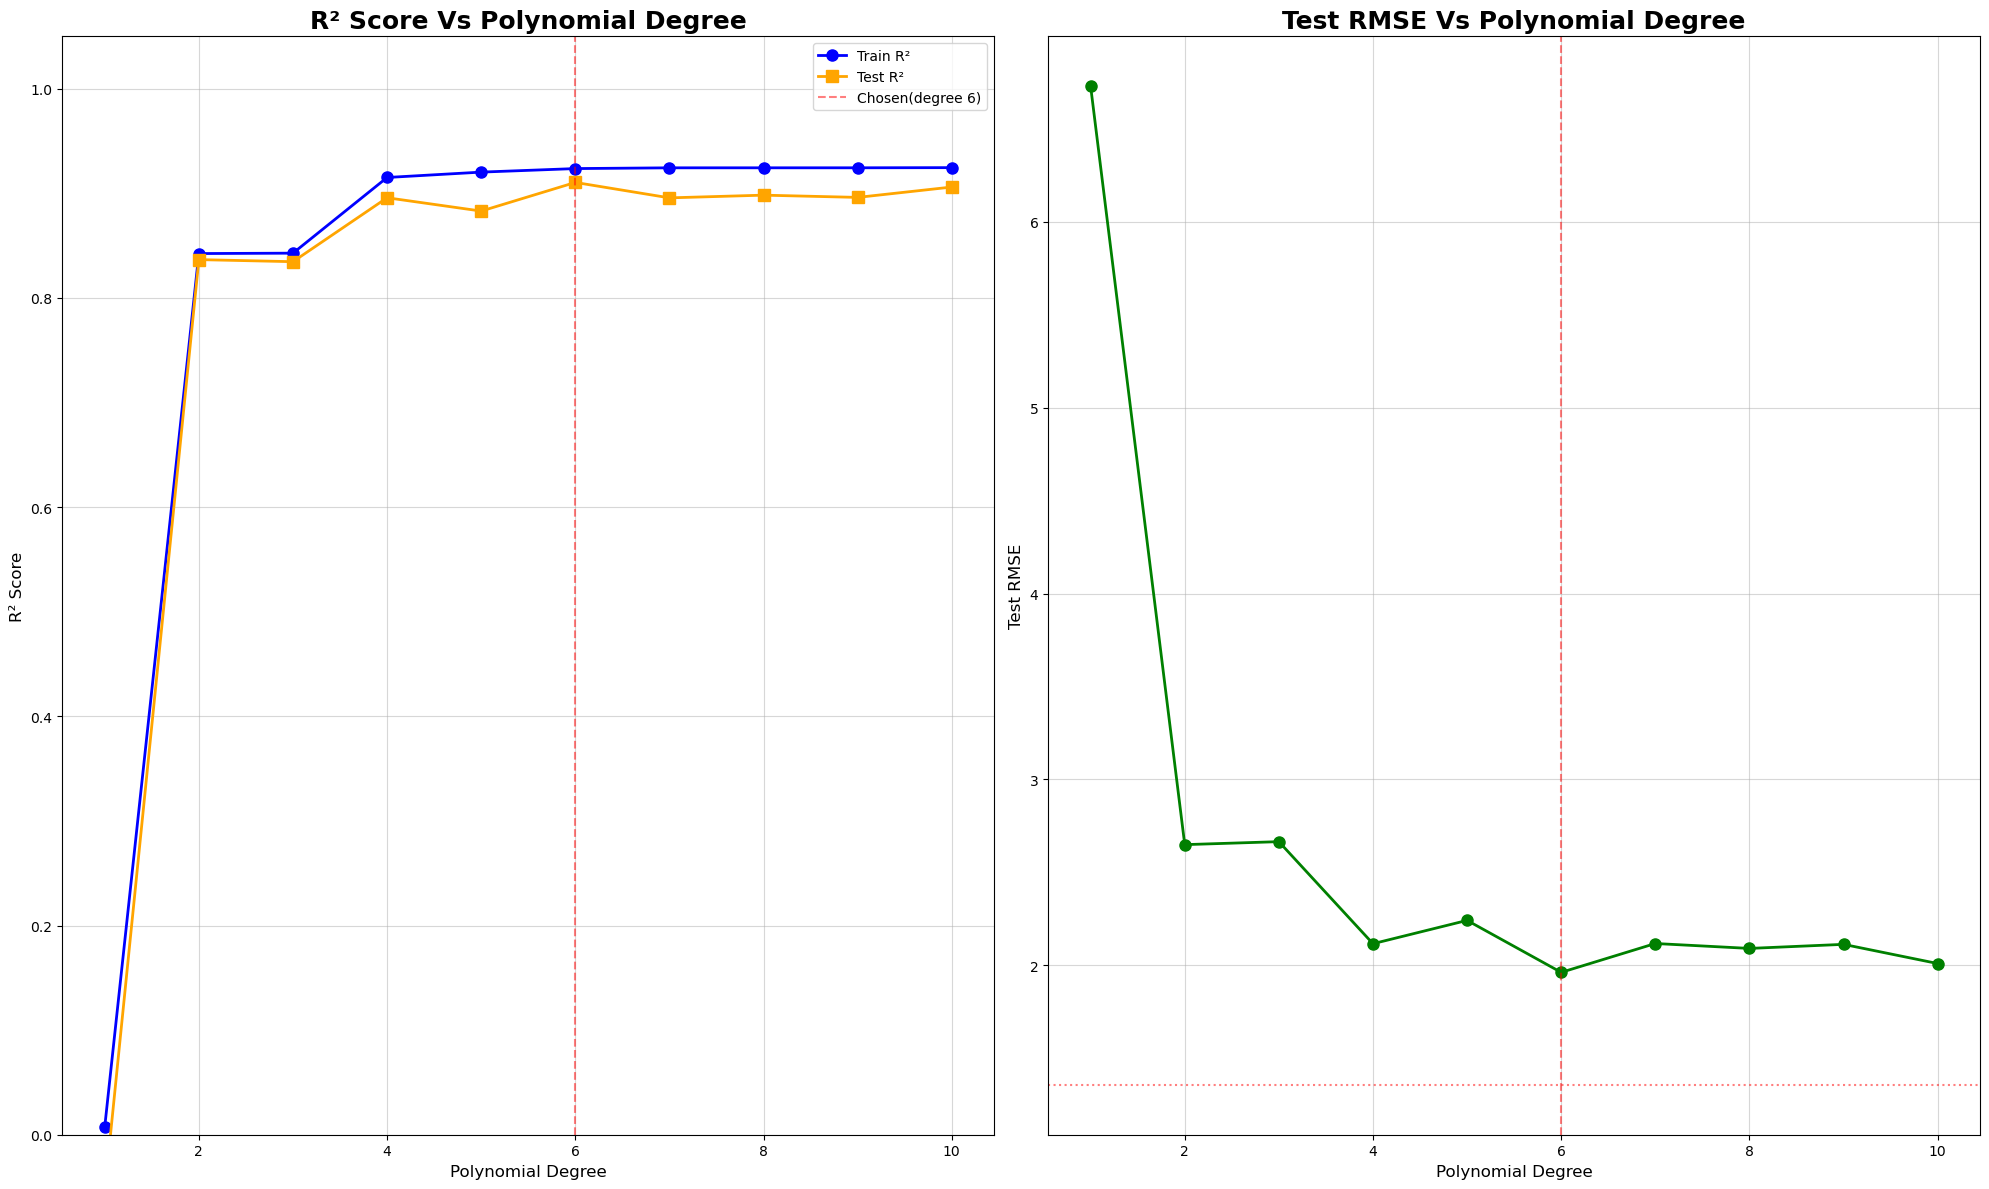

In [309]:
# Plot 2. Performance metrics

fig, axes = plt.subplots(1, 2, figsize = (20,12))
degrees = [r["degree"] for r in results]
train_r2s = [r["train_r2"] for r in results]
test_r2s = [r["test_r2"] for r in results]
test_rmses = [r["test_rmse"] for r in results]


# R² comparisons
axes[0].plot(degrees, train_r2s, "o-", linewidth = 2, markersize = 8, label = "Train R²", color = "blue")        
axes[0].plot(degrees, test_r2s, "s-", linewidth = 2, markersize = 8, label = "Test R²", color = "orange")
axes[0].axvline(chosen["degree"], color = "red",  linestyle = "--", alpha = 0.5, label =f"Chosen(degree {chosen["degree"]})")
axes[0].set_xlabel("Polynomial Degree", fontsize = 12)
axes[0].set_ylabel("R² Score", fontsize = 12)
axes[0].set_title("R² Score Vs Polynomial Degree", fontsize = 18, fontweight = "bold")
axes[0].legend(fontsize = 10)
axes[0].grid(True, alpha = 0.5)
axes[0].set_ylim([0, 1.05])


# RMSE comparisons
axes[1].plot(degrees, test_rmses, "o-", linewidth = 2, markersize = 8, color = "green")
axes[1].axvline(chosen["degree"], color = "red", linestyle = "--", alpha = 0.5, label = f"Chosen(degree {chosen["degree"]})")
axes[1].axhline(chosen["test_rmse"], color = "red", linestyle = ":", alpha = 0.5)
axes[1].set_xlabel("Polynomial Degree", fontsize = 12)
axes[1].set_ylabel("Test RMSE", fontsize = 12)
axes[1].set_title("Test RMSE Vs Polynomial Degree", fontsize = 18, fontweight = "bold")
axes[1].grid(True, alpha = 0.5)

plt.tight_layout()


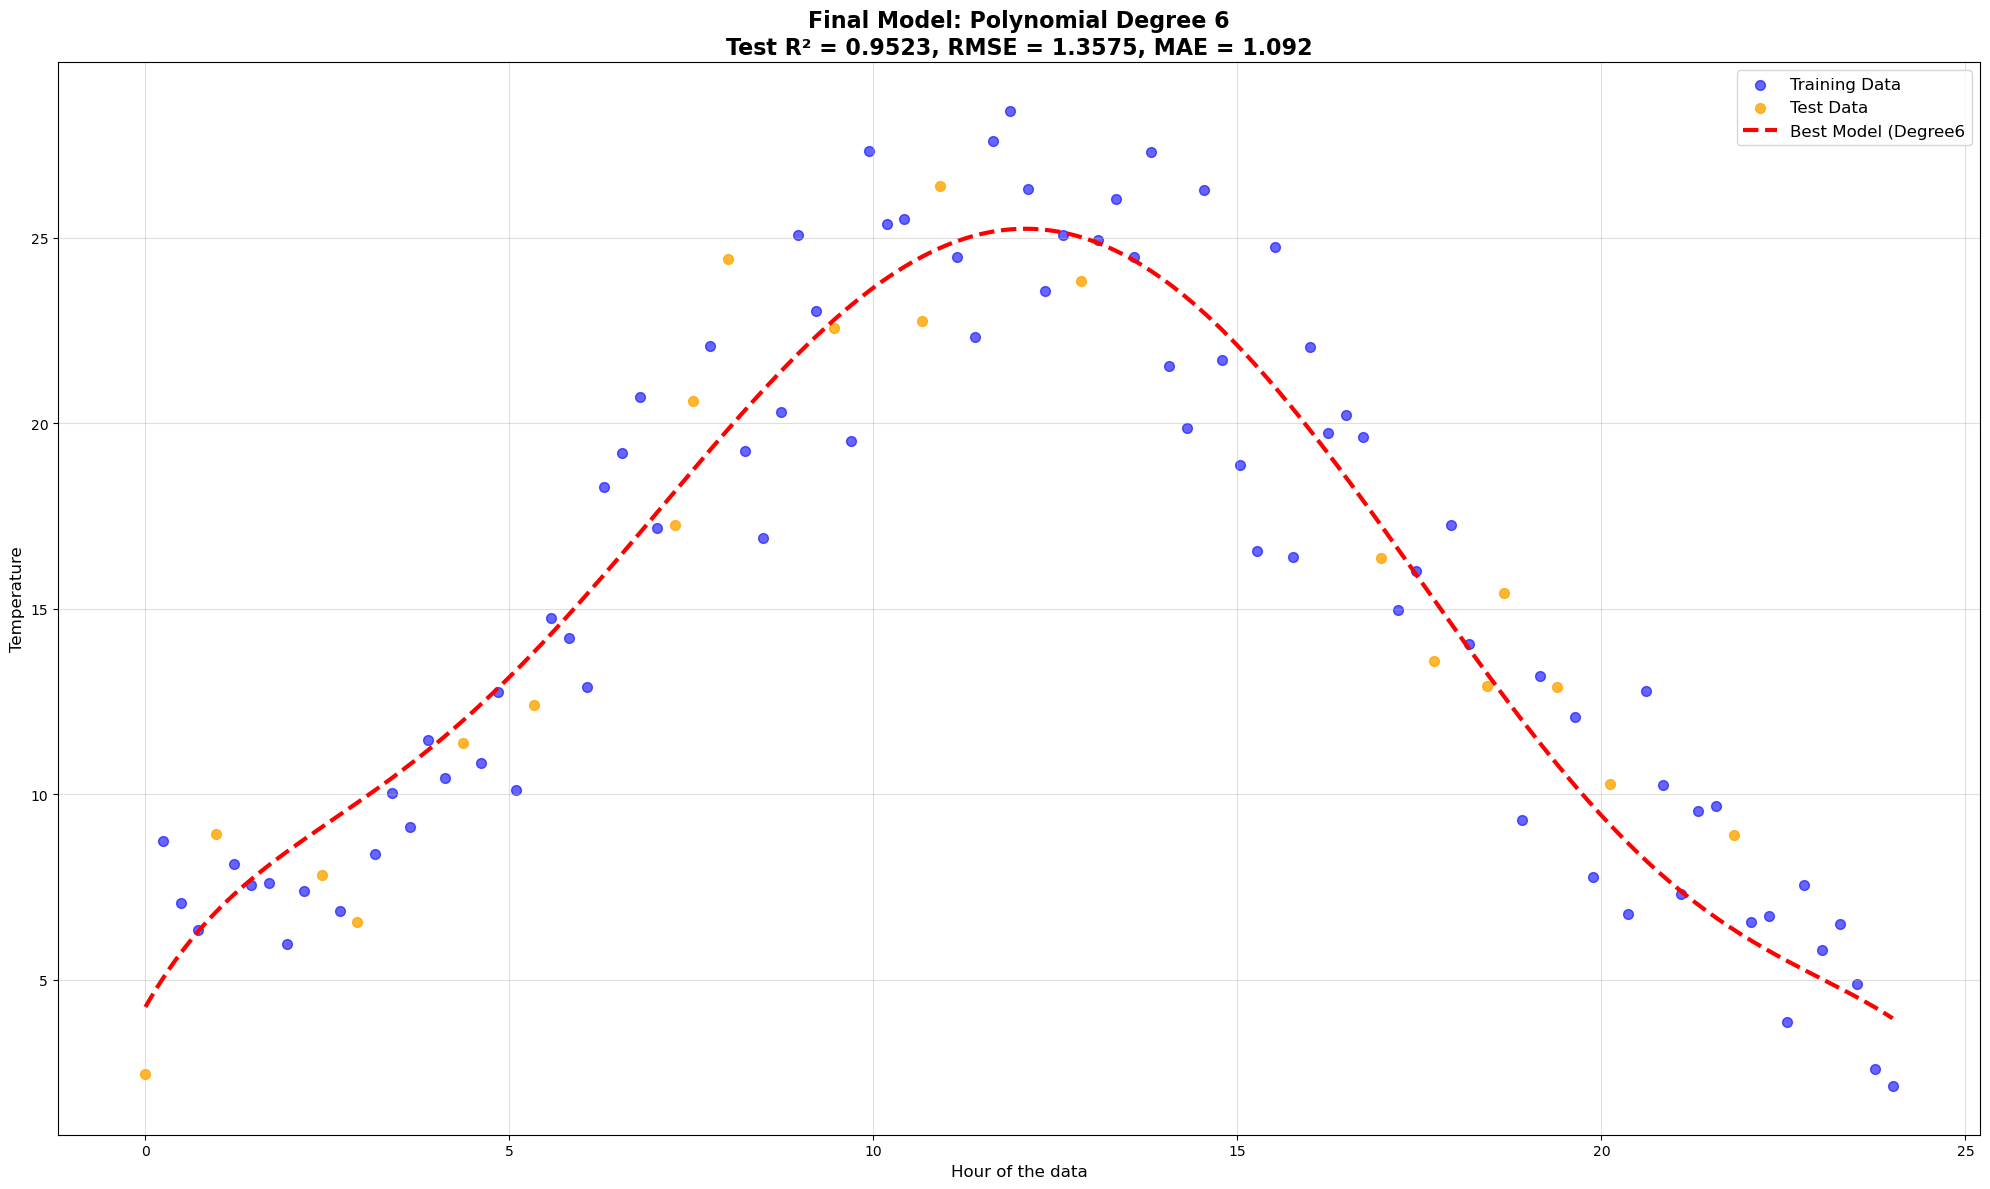

In [337]:
# Plot 3. Final best model

fig, ax = plt.subplots(figsize = (20,12))

# Plot all the data 
ax.scatter(X_train, y_train, alpha = 0.6, s = 50, label = "Training Data", color = "blue")
ax.scatter(X_test, y_test, alpha = 0.8, s = 50, label = "Test Data", color = "orange")

# Plot prediction line
X_plot = np.linspace(0, 24, 300).reshape(-1, 1)
X_plot_poly = chosen["poly"].transform(X_plot)
y_plot = chosen["model"].predict(X_plot_poly)
ax.plot(X_plot, y_plot, "r--", linewidth = 3, label = f"Best Model (Degree{chosen["degree"]}")


# Formatting
ax.set_xlabel("Hour of the data", fontsize = 12)
ax.set_ylabel("Temperature", fontsize = 12)
ax.set_title(
    f"Final Model: Polynomial Degree {chosen["degree"]}\n"
    f"Test R² = {chosen["test_r2"]:.4f}, RMSE = {chosen["test_rmse"]:.4f}, MAE = {chosen["test_mae"]:.3f}",
    fontsize = 16, 
    fontweight = "bold"
)

ax.legend(fontsize = 12)
ax.grid(True, alpha = 0.4)
plt.tight_layout()



In [388]:
# Use the best model for predictions

# Make predictions for specific times
prediction_hours = np.array([[6], [12], [18], [23]])
prediction_hours_poly = chosen["poly"].transform(prediction_hours)
predicted_temps = chosen["model"].predict(prediction_hours_poly)

print(f"Predictions using Degree {chosen["degree"]} model")
print(f"Hours   | Predicted Temperature")


for hour, temp in zip(prediction_hours.ravel(), predicted_temps):
    print(f"{hour:4.0f}   |{temp:10.2f}")

Predictions using Degree 6 model
Hours   | Predicted Temperature
   6   |     15.25
  12   |     25.23
  18   |     14.42
  23   |      5.05


In [ ]:
"""
1. You have a dataset
2. Split data (80/20 or 70/30) -> train_test_split()

3. Test multiple degrees

4. For each degree:
 - Transform: PolynomialFeatures(degree=d)
 - Fit: LinearRegression()
 - Evaluate: Calculate train/test R², RMSE, MAE


5. Compare results:
 - Look at Test R² (higher = better)
 - Look at Test RMSE ( lower = better)
 - Check train-test gap (> 0.1 = good)
 - Visual insepction (smooth curve?)

6. Choose best degree using:
 - Best test performance
 - No overfitting (small train-test gap)
 - Simplest model that works well.

7. Use chosen modek for predictions


Red flags:
- Train R² much higher than Test R² --> Overfitting
- Test R² decreasing as degree increases --> Overfitting 
- Wild oscillations in plot --> Overfitting 
- Degree > 10 usually unnecessary 

Green flags:
- Train R² ≈ Test  R²  (within 0.1)
- Smooth prediction curve
- Test RMSE reasonable for your application
- Simple model (lower degree) if performance similar 

"""